## Classification - KNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv')

In [4]:
df.head(3)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3


### Target variable

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

In [5]:
df.custcat.value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

### Data Analysis

In [15]:
print('shape:',df.shape)
print('columns:',df.columns.values)

shape: (1000, 12)
columns: ['region' 'tenure' 'age' 'marital' 'address' 'income' 'ed' 'employ'
 'retire' 'gender' 'reside' 'custcat']


In [17]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

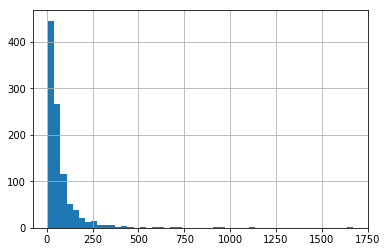

In [9]:
df['income'].hist(bins=50)

In [10]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
region     1000 non-null int64
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null int64
address    1000 non-null int64
income     1000 non-null float64
ed         1000 non-null int64
employ     1000 non-null int64
retire     1000 non-null float64
gender     1000 non-null int64
reside     1000 non-null int64
custcat    1000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 93.8 KB


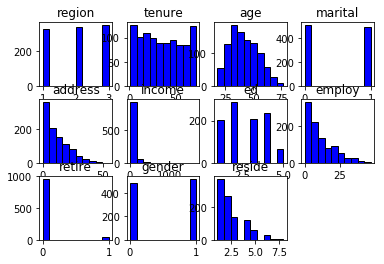

In [26]:
for i, col in enumerate(df.columns[0:11]):
    ax = plt.subplot(3, 4, i + 1)
    
    # Draw the plot
    ax.hist(df[col],color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('{}' .format(col))
   

In [13]:
df.isnull().values.any()

False

In [27]:
X=df.iloc[:,0:11]
X.shape

(1000, 11)

In [20]:
X.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside'],
      dtype='object')

In [28]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:3]

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004]])

### Modeling

In [29]:
from sklearn.model_selection import train_test_split
y=df['custcat'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=123)
print('Xtrain:',X_train.shape,'\nXtest:',X_test.shape)
print('\nytrain:',y_train.shape,'\nytest:',y_test.shape)


Xtrain: (800, 11) 
Xtest: (200, 11)

ytrain: (800,) 
ytest: (200,)


#### Test Water

In [30]:
from sklearn.neighbors import KNeighborsClassifier
k=4
model1=KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_predict=model1.predict(X_test)

In [31]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model1.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy:  0.5625
Test set Accuracy:  0.345


#### Find best K

In [33]:
y_predict.shape[0]
np.std(y_predict==y_test)/np.sqrt(y_predict.shape[0])

0.03361361331365612

In [35]:
np.std(y_predict==y_test)

0.4753682782853732

In [42]:
km=11
mean_acc_test=np.zeros(km-1)
mean_acc_train=np.zeros(km-1)
std_acc_test = np.zeros((km-1))
for i in range(1,km):
    model=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    yhat=model.predict(X_test)
    mean_acc_test[i-1]=metrics.accuracy_score(y_test,yhat)
    mean_acc_train[i-1]=metrics.accuracy_score(y_train,model.predict(X_train))
    std_acc_test[i-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print('mean_acc_test:',mean_acc_test)
print('mean_acc_train:',mean_acc_train)


mean_acc_test: [0.32  0.32  0.33  0.345 0.33  0.34  0.31  0.29  0.32  0.32 ]
mean_acc_train: [1.      0.63    0.57    0.5625  0.5525  0.52125 0.51875 0.4975  0.48625
 0.47125]


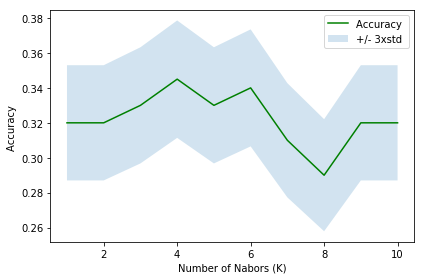

In [44]:
plt.plot(range(1,km),mean_acc_test,'g')
plt.fill_between(range(1,km),mean_acc_test - 1 * std_acc_test,mean_acc_test + 1 * std_acc_test, alpha=0.20)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()

**BAM!!** Very low accuracy... Train acc much better than test-- overfitting!Back to reduce feature and refine model